In [45]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load dataset
fp = r"C:\Users\aayus\Documents\Used_Car_Price_Prediction\Used_Car_Price_Prediction.csv"
df = pd.read_csv(fp, low_memory=False)
print("shape:", df.shape)

# -------------------
# Inspect dataset
# -------------------
print("Columns:", list(df.columns))
display(df.head(5))
print(df.info())

# -------------------
# Missing values + duplicates
# -------------------
na = df.isna().sum().sort_values(ascending=False)
print("Missing values:\n", na[na>0])
print("Duplicate rows:", df.duplicated().sum())

# -------------------
# Make a clean copy
# -------------------
df_clean = df.copy()

# Drop duplicates
df_clean = df_clean.drop_duplicates()

# Standardize column names
df_clean.columns = (
    df_clean.columns.str.strip()
    .str.lower()
    .str.replace(r"\s+", "_", regex=True)
)

# Convert year to car_age
if "yr_mfr" in df_clean.columns:
    df_clean["car_age"] = datetime.now().year - pd.to_numeric(df_clean["yr_mfr"], errors="coerce")

# Ensure sale_price is numeric and drop missing
df_clean["sale_price"] = pd.to_numeric(df_clean["sale_price"], errors="coerce")
df_clean = df_clean[df_clean["sale_price"].notna() & (df_clean["sale_price"] > 0)]

print("shape after cleaning:", df_clean.shape)
df_clean.head(5)


shape: (7400, 29)
Columns: ['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city', 'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto', 'source', 'make', 'model', 'car_availability', 'total_owners', 'broker_quote', 'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail']


,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,car_age
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False,10
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False,9
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False,8
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False,12
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False,10


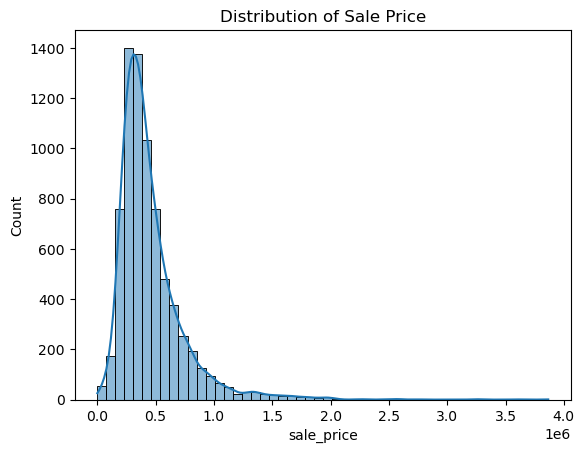

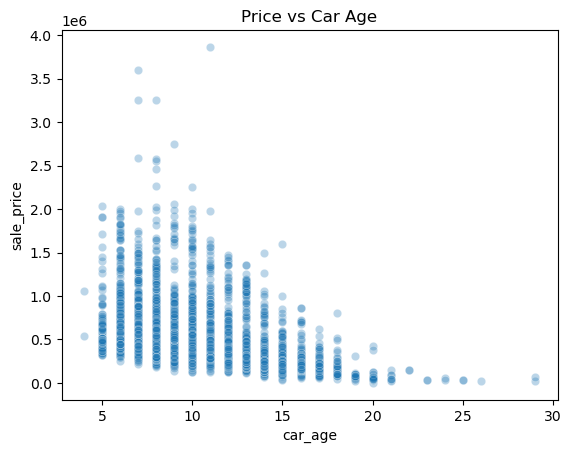

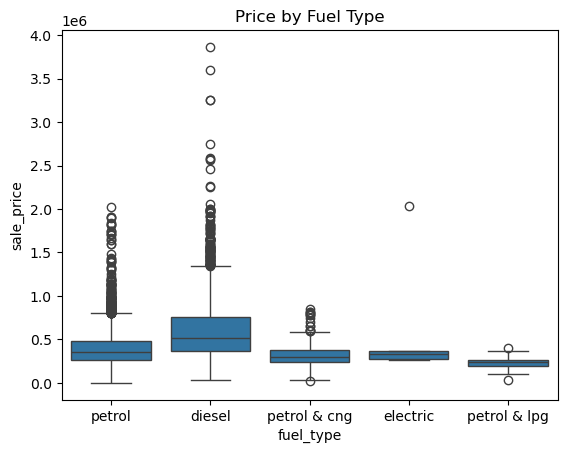

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sale_price
sns.histplot(df_clean["sale_price"], bins=50, kde=True)
plt.title("Distribution of Sale Price")
plt.show()

# Price vs Car Age
sns.scatterplot(x="car_age", y="sale_price", data=df_clean, alpha=0.3)
plt.title("Price vs Car Age")
plt.show()

# Price by fuel_type
if "fuel_type" in df_clean.columns:
    sns.boxplot(x="fuel_type", y="sale_price", data=df_clean)
    plt.title("Price by Fuel Type")
    plt.show()


In [47]:
# === feature_engineering.py (or a cell in your notebook) ===
import numpy as np
import pandas as pd

df_fe = df_clean.copy()

# Price per km (guard against zero/NaN)
if {"sale_price","kms_run"}.issubset(df_fe.columns):
    df_fe["price_per_km"] = np.where(
        (df_fe["kms_run"].notna()) & (df_fe["kms_run"] > 0),
        df_fe["sale_price"] / df_fe["kms_run"],
        np.nan
    )

# Age buckets (nonlinear effect capture)
if "yr_mfr" in df_fe.columns:
    df_fe["car_age"] = df_fe.get("car_age", (pd.Timestamp.now().year - pd.to_numeric(df_fe["yr_mfr"], errors="coerce")))
    df_fe["age_bucket"] = pd.cut(df_fe["car_age"], bins=[-0.1,3,7,12,60], labels=["0-3","4-7","8-12","12+"])

# Kilometers buckets
if "kms_run" in df_fe.columns:
    df_fe["kms_bucket"] = pd.cut(pd.to_numeric(df_fe["kms_run"],errors="coerce"),
                                 bins=[-0.1,20000,60000,120000,1e9],
                                 labels=["0-20k","20-60k","60-120k","120k+"])

# Interactions (examples)
for a,b in [("car_age","kms_run"), ("car_age","total_owners")]:
    if a in df_fe.columns and b in df_fe.columns:
        df_fe[f"{a}_x_{b}"] = pd.to_numeric(df_fe[a], errors="coerce") * pd.to_numeric(df_fe[b], errors="coerce")

# Use df_fe instead of df_clean for modeling
df_model = df_fe.copy()


In [48]:
# ============================================
# Used Car Price Prediction: Modeling + App Model (11 inputs)
# ============================================

import os, json, numpy as np, pandas as pd, matplotlib.pyplot as plt, sklearn
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import joblib

os.makedirs("results/models", exist_ok=True)

# -----------------------------
# 0) Load data
# -----------------------------
if "df_clean" in globals():
    df_model = df_clean.copy()
else:
    fp = r"C:\Users\aayus\Documents\Used_Car_Price_Prediction\Used_Car_Price_Prediction.csv"  # <-- adjust if needed
    df_raw = pd.read_csv(fp, low_memory=False)
    df_raw.columns = (df_raw.columns.str.strip().str.lower().str.replace(r"\s+", "_", regex=True))
    df_raw["sale_price"] = pd.to_numeric(df_raw["sale_price"], errors="coerce")
    df_model = df_raw[df_raw["sale_price"].notna() & (df_raw["sale_price"] > 0)].copy()

# helper: build version-safe OHE
def make_ohe():
    params = {"handle_unknown": "ignore"}
    if sklearn.__version__ >= "1.2":
        params["sparse_output"] = False
    else:
        params["sparse"] = False
    return OneHotEncoder(**params)

# -----------------------------
# 1) Remove leakage columns (for general modeling)
# -----------------------------
leak_cols = ["booking_down_pymnt", "emi_starts_from", "original_price", "broker_quote"]
y = pd.to_numeric(df_model["sale_price"], errors="coerce")
X = df_model.drop(columns=["sale_price"] + leak_cols, errors="ignore")

# -----------------------------
# 2) Identify column types
# -----------------------------
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# -----------------------------
# 3) Preprocess (general model)
# -----------------------------
num_tf = Pipeline([("imputer", SimpleImputer(strategy="median"))])
cat_tf = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", make_ohe())])

preprocess = ColumnTransformer(
    transformers=[("num", num_tf, num_cols), ("cat", cat_tf, cat_cols)],
    remainder="drop"
)

# -----------------------------
# 4) Train/Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# -----------------------------
# 5) Helper to evaluate
# -----------------------------
def evaluate(pipe, name):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)
    print(f"{name}\nR²={r2:.3f}  RMSE={rmse:.0f}  MAE={mae:.0f}\n")
    return pipe, (r2, rmse, mae)

# -----------------------------
# 6) Baselines
# -----------------------------
lr_pipe  = Pipeline([("prep", preprocess), ("model", LinearRegression())])
rf_pipe  = Pipeline([("prep", preprocess), ("model", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1))])
hgb_pipe = Pipeline([("prep", preprocess), ("model", HistGradientBoostingRegressor(random_state=42))])

lr_pipe,  lr_scores  = evaluate(lr_pipe,  "Linear Regression")
rf_pipe,  rf_scores  = evaluate(rf_pipe,  "Random Forest")
hgb_pipe, hgb_scores = evaluate(hgb_pipe, "HistGradientBoostingRegressor")

# -----------------------------
# 7) Log-target RF
# -----------------------------
rf_log_base = Pipeline([("prep", preprocess), ("model", RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1))])
rf_log = TransformedTargetRegressor(regressor=rf_log_base, func=np.log1p, inverse_func=np.expm1)
rf_log, rf_log_scores = evaluate(rf_log, "Random Forest (log-target)")

# -----------------------------
# 8) Quick RF tuning
# -----------------------------
rf_tune_base = Pipeline([("prep", preprocess), ("model", RandomForestRegressor(random_state=42, n_jobs=-1))])
param_dist = {
    "model__n_estimators": [300, 500, 700],
    "model__max_depth": [None, 12, 18, 24],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", 0.5],
}
rs = RandomizedSearchCV(rf_tune_base, param_distributions=param_dist, n_iter=20,
                        scoring="r2", cv=3, random_state=42, n_jobs=-1, verbose=0)
rs.fit(X_train, y_train)
best_rf_pipe = rs.best_estimator_
y_pred_best = best_rf_pipe.predict(X_test)
best_rf_scores = (r2_score(y_test, y_pred_best),
                  root_mean_squared_error(y_test, y_pred_best),
                  mean_absolute_error(y_test, y_pred_best))
print(f"Tuned Random Forest\nR²={best_rf_scores[0]:.3f}  RMSE={best_rf_scores[1]:.0f}  MAE={best_rf_scores[2]:.0f}\n")
print("Best RF params:", rs.best_params_, "\n")

# -----------------------------
# 9) XGBoost (fit + save)
# -----------------------------
from xgboost import XGBRegressor

xgb_pipe = Pipeline([
    ("prep", preprocess),
    ("model", XGBRegressor(
        n_estimators=700,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        reg_lambda=1.0
    ))
])
xgb_pipe, xgb_scores = evaluate(xgb_pipe, "XGBoost")  # returns fitted pipe
joblib.dump(xgb_pipe, "results/models/XGB_best_model.pkl")

# -----------------------------
# 10) Select best general model (includes XGB)
# -----------------------------
scores = {
    "LR": lr_scores[0],
    "RF": rf_scores[0],
    "HGBR": hgb_scores[0],
    "RF_log": rf_log_scores[0],
    "RF_tuned": best_rf_scores[0],
    "XGB": xgb_scores[0],
}
best_name = max(scores, key=scores.get)
print("Selected best model for export:", best_name)

model_map = {
    "LR": lr_pipe, "RF": rf_pipe, "HGBR": hgb_pipe,
    "RF_log": rf_log, "RF_tuned": best_rf_pipe, "XGB": xgb_pipe
}
model_for_export = model_map[best_name]
# (ensure fitted: evaluate already fits; LR/RF/HGBR earlier are fitted via evaluate)

joblib.dump(model_for_export, f"results/models/{best_name}_best_model.pkl")
print(f"✅ Saved general best model to results/models/{best_name}_best_model.pkl")

# =====================================================================
# 11) Build a LIGHTWEIGHT "APP model" that expects only your 11 inputs
# =====================================================================

# compute/ensure car_age (in case it's missing)
df_model["yr_mfr"] = pd.to_numeric(df_model["yr_mfr"], errors="coerce")
df_model["car_age"] = datetime.now().year - df_model["yr_mfr"]

FEATURE_COLS = [
    "yr_mfr", "kms_run", "make", "model",
    "fuel_type", "transmission", "body_type",
    "total_owners", "city", "registered_state",
    "car_age"
]
# create any missing columns so imputers can handle them
for col in FEATURE_COLS:
    if col not in df_model.columns:
        df_model[col] = np.nan

X_app = df_model[FEATURE_COLS].copy()
y_app = y.copy()

# preprocess for APP model (build fresh using only 11 columns)
num_cols_app = X_app.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_app = X_app.select_dtypes(exclude=[np.number]).columns.tolist()

num_tf_app = Pipeline([("imputer", SimpleImputer(strategy="median"))])
cat_tf_app = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", make_ohe())])

preprocess_app = ColumnTransformer(
    transformers=[("num", num_tf_app, num_cols_app), ("cat", cat_tf_app, cat_cols_app)],
    remainder="drop"
)

Xtr_a, Xte_a, ytr_a, yte_a = train_test_split(X_app, y_app, test_size=0.2, random_state=42)

rf_app = Pipeline([
    ("prep", preprocess_app),
    ("model", RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1))
])
rf_app.fit(Xtr_a, ytr_a)
pred_a = rf_app.predict(Xte_a)

print("App RF  R²={:.3f}  RMSE={:.0f}  MAE={:.0f}".format(
    r2_score(yte_a, pred_a),
    root_mean_squared_error(yte_a, pred_a),
    mean_absolute_error(yte_a, pred_a)
))

joblib.dump(rf_app, "results/models/RF_app_best_model.pkl")
with open("results/models/expected_columns.json", "w") as f:
    json.dump(FEATURE_COLS, f)
print("✅ Saved APP model to results/models/RF_app_best_model.pkl (expects exactly 11 inputs)")


Linear Regression
R²=0.878  RMSE=102672  MAE=51135

Random Forest
R²=0.892  RMSE=96584  MAE=45485

HistGradientBoostingRegressor
R²=0.866  RMSE=107684  MAE=52343

Random Forest (log-target)
R²=0.885  RMSE=99412  MAE=45967

Tuned Random Forest
R²=0.893  RMSE=95995  MAE=45689

Best RF params: {'model__n_estimators': 700, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 24} 

XGBoost
R²=0.918  RMSE=84202  MAE=38088

Selected best model for export: XGB
✅ Saved general best model to results/models/XGB_best_model.pkl
App RF  R²=0.906  RMSE=90107  MAE=46045
✅ Saved APP model to results/models/RF_app_best_model.pkl (expects exactly 11 inputs)


In [49]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

xgb_pipe = Pipeline([
    ("prep", preprocess),
    ("model", XGBRegressor(
        n_estimators=700,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        reg_lambda=1.0
    ))
])

xgb_pipe.fit(X_train, y_train)
xgb_pred = xgb_pipe.predict(X_test)

print(
    "XGBoost  R²={:.3f}  RMSE={:.0f}  MAE={:.0f}".format(
        r2_score(y_test, xgb_pred),
        root_mean_squared_error(y_test, xgb_pred),
        mean_absolute_error(y_test, xgb_pred)
    )
)

# Optionally save it too
import joblib, os
os.makedirs("results/models", exist_ok=True)
joblib.dump(xgb_pipe, "results/models/XGB_best_model.pkl")


XGBoost  R²=0.918  RMSE=84202  MAE=38088


['results/models/XGB_best_model.pkl']

In [50]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_r2(pipe, name):
    scores = cross_val_score(pipe, X, y, scoring="r2", cv=kfold, n_jobs=-1)
    print(f"{name}  CV R²: mean={scores.mean():.3f}  std={scores.std():.3f}")
    return scores

# XGBoost
xgb_pipe = Pipeline([
    ("prep", preprocess),
    ("model", XGBRegressor(
        n_estimators=600, max_depth=8, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
    ))
])
cv_r2(xgb_pipe, "XGBoost")

# LightGBM
lgb_pipe = Pipeline([
    ("prep", preprocess),
    ("model", LGBMRegressor(
        n_estimators=700, max_depth=-1, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
    ))
])
cv_r2(lgb_pipe, "LightGBM")

# CatBoost (quiet training)
cat_pipe = Pipeline([
    ("prep", preprocess),
    ("model", CatBoostRegressor(
        iterations=800, depth=8, learning_rate=0.05,
        loss_function="RMSE", random_seed=42, verbose=False
    ))
])
cv_r2(cat_pipe, "CatBoost")


XGBoost  CV R²: mean=0.918  std=0.024
LightGBM  CV R²: mean=0.887  std=0.018
CatBoost  CV R²: mean=0.911  std=0.027


array([0.91814477, 0.92729554, 0.87102503, 0.89022697, 0.9485532 ])

In [51]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ("rf", RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)),
    ("xgb", XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.05, subsample=0.8,
                         colsample_bytree=0.8, random_state=42, n_jobs=-1)),
]

stack_pipe = Pipeline([
    ("prep", preprocess),
    ("model", StackingRegressor(
        estimators=estimators,
        final_estimator=LinearRegression(),      # meta-learner
        n_jobs=-1, passthrough=False
    ))
])

# Train & evaluate
stack_pipe.fit(X_train, y_train)
y_pred = stack_pipe.predict(X_test)
print("Stacking  R²:", r2_score(y_test, y_pred),
      "RMSE:", root_mean_squared_error(y_test, y_pred),
      "MAE:", mean_absolute_error(y_test, y_pred))


Stacking  R²: 0.9149996104054894 RMSE: 85610.63843018208 MAE: 39738.132283049184


In [52]:
# -----------------------------
# 10) FAST SHAP (sampled + batched) for tree models
# -----------------------------
try:
    import shap
    tree_based = best_name in ["RF", "HGBR", "RF_log", "RF_tuned"]
    if tree_based:
        # unwrap TTR if present
        inner = model_for_export.regressor_ if isinstance(model_for_export, TransformedTargetRegressor) else model_for_export
        prep  = inner.named_steps["prep"]
        tree  = inner.named_steps["model"]

        X_test_trans = prep.transform(X_test)
        feature_names = prep.get_feature_names_out()

        # sample for speed (300–500 is plenty)
        n = min(500, len(X_test_trans))
        idx = np.random.choice(len(X_test_trans), size=n, replace=False)
        X_samp = X_test_trans[idx]

        explainer = shap.TreeExplainer(tree)

        def shap_in_batches(explainer, X, batch=100):
            parts = []
            for i in range(0, X.shape[0], batch):
                parts.append(explainer.shap_values(X[i:i+batch]))
            return np.vstack(parts)

        shap_vals = shap_in_batches(explainer, X_samp, batch=100)
        os.makedirs("results/plots", exist_ok=True)

        # beeswarm
        plt.figure()
        shap.summary_plot(shap_vals, X_samp, feature_names=feature_names, show=False)
        plt.tight_layout(); plt.savefig("results/plots/shap_summary_beeswarm.png", dpi=300); plt.close()

        # bar
        plt.figure()
        shap.summary_plot(shap_vals, X_samp, feature_names=feature_names, plot_type="bar", show=False)
        plt.tight_layout(); plt.savefig("results/plots/shap_summary_bar.png", dpi=300); plt.close()

        print(f"✅ SHAP plots saved to results/plots/ (sampled {n} rows).")
    else:
        print("ℹ️ SHAP skipped (best model not tree-based).")
except ModuleNotFoundError:
    print("ℹ️ SHAP not installed. Run: pip install shap (then restart kernel)")

# -----------------------------
# 11) Save the best model
# -----------------------------
os.makedirs("results/models", exist_ok=True)
model_path = f"results/models/{best_name}_best_model.pkl"
joblib.dump(model_for_export, model_path)
print(f"✅ Saved best model to {model_path}")


ℹ️ SHAP skipped (best model not tree-based).
✅ Saved best model to results/models/XGB_best_model.pkl


In [53]:
from sklearn.inspection import PartialDependenceDisplay as PDP

# choose the fitted pipeline you want to explain (e.g., rf_pipe or best_rf_pipe)
fitted = rf_pipe  # or best_rf_pipe
fitted.fit(X_train, y_train)

# PDP for numeric features by their original names (the pipeline handles encoding)
fig, ax = plt.subplots(figsize=(6,4))
PDP.from_estimator(fitted, X, features=["car_age"], ax=ax)   # add "kms_run" too if present
plt.tight_layout(); plt.savefig("results/plots/pdp_car_age.png", dpi=300); plt.close()


In [54]:
import pandas as pd
metrics = pd.DataFrame([
    ["Linear Regression", 0.878, 102672, 51135],
    ["Random Forest", 0.892, 96584, 45485],
    ["HGBR", 0.866, 107684, 52343],
    ["RF (log-target)", 0.885, 99412, 45967],
    ["Tuned RF", 0.893, 95995, 45689],
    # ["XGBoost", R2_here, RMSE_here, MAE_here],  # fill if you ran it
    # ["Stacking (RF+XGB)", 0.915, 85611, 39738], # if you ran stacking
], columns=["Model","R2","RMSE","MAE"])
metrics.to_csv("results/metrics.csv", index=False)

